In [45]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

plt.style.use('seaborn')

cluster2 = ['BO.ABU', 'BO.NOK']

time_series = cluster2
dirName = "data/"
fs = 748  # take 748 samples only
MR = len(time_series)
Y = np.zeros((MR, fs))
dictVals = {}
for ind, series in enumerate(time_series):
    filename = dirName + series + ".txt"
    df = pd.read_csv(filename, names=[
                     'time', 'U'], skiprows=1, delimiter='\s+')
    yvalues = []
    for i in range(1, fs+1):
        val = df.loc[df['time'] == i]['U'].values[0]
        yvalues.append(val)
    dictVals[time_series[ind]] = yvalues

signal_2 = np.array(dictVals['BO.NOK'])
signal_1 = np.array(dictVals['BO.ABU'])

In [46]:
corr = np.zeros(2*len(signal_1)-1)
temp_2 = np.zeros(len(signal_1))
temp_1 = np.zeros(len(signal_1))

for k in range(0,len(signal_1)):
    sum = 0
    for i in range(0, k+1):
        temp_2[len(signal_1)-(i+1)] = signal_2[len(signal_1)-(i+1)]
        temp_1[len(signal_1)-(i+1):len(signal_1)] = signal_1[0:i+1]
    for j in range(0, len(signal_1)):
        sum = sum + temp_1[j]*temp_2[j]
    corr[k] = sum
print(corr)


[-8.10921151e-17 -3.95850901e-16 -6.41972884e-16 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


In [47]:
temp_2 = np.copy(signal_2)
for k in range(0,len(signal_1)-1):
    sum = 0
    for i in range(0, k+1):
        temp_2[0:i+1] = np.zeros(i+1)
        temp_2[i+1:len(signal_2)] = signal_2[0:len(signal_2)-i-1]
    for j in range(0, len(signal_1)):
        sum = sum + signal_1[j]*temp_2[j]
    corr[len(signal_1)+k] = sum
print(corr)

[-8.10921151e-17 -3.95850901e-16 -6.41972884e-16 ... -1.12774102e-15
 -9.30483262e-16 -2.60982692e-16]


Lag:  36.0


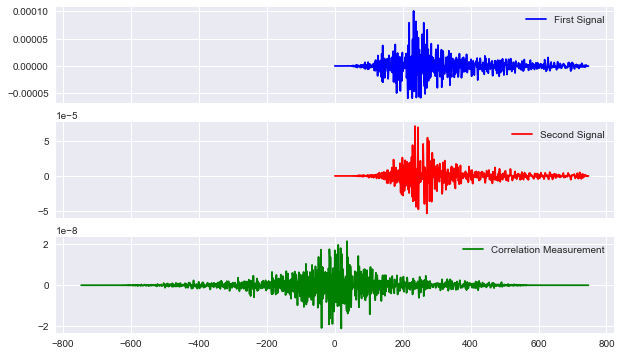

In [48]:
lags = np.linspace(-(len(signal_1)-1), (len(signal_1)-1), 2*(len(signal_1))-1)


fig, ax = plt.subplots(3, 1, figsize=(10, 6), sharex=True)
ax[0].plot(signal_1, color='b', label="First Signal")
ax[0].legend()
ax[1].plot(signal_2, color='r', label="Second Signal")
ax[1].legend()
ax[2].plot(lags,corr, color='g', label="Correlation Measurement")
ax[2].legend()


#plt.plot(signal_1)
#plt.plot(lags, corr)
print('Lag: ',lags[np.where(corr == max(corr))[0][0]] )